<a href="https://colab.research.google.com/github/RamMonik/FinalAnalisisDatos/blob/main/Analisis_de_datos_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Datos informativos
## Proyecto académico final

# Nombres:  AIZPRUA BARRIOS JARIS SURYA
#           RAMÍREZ VELÁSTEGUI MÓNICA ALEXANDRA
# Fecha: 20/07/2024

In [2]:
# Cargar librerias
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
import time
from PIL import Image
from IPython.core import display as ICD
%matplotlib inline

In [3]:
## 1. Carga de datos


from google.colab import drive
#drive.mount('/content/ProyectoFinal/')
df = pd.read_csv('/content/ProyectoFinal/SeoulBikeData.csv', delimiter=",")
# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
## 2. EDA

# 2.1 Verificar tipos de datos
def verificar_tipos(df):
    return df.dtypes

print(verificar_tipos(df))

# Convertir la columna 'Date' de objeto a datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()
print(verificar_tipos(df))

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object
Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)               

In [ ]:
# 2.2 Resumen estadístico
def resumen_estadistico(df):
    return df.describe()

resumen_estadistico(df)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


In [15]:
#imprimo numero de registros de df
num_filas = len(df)
print("Número de filas en el DataFrame:", num_filas)

Número de filas en el DataFrame: 8760


In [5]:
# 2.3 Verificar valores faltantes y obtiene el total de registros y el porcentaje
def verificar_faltantes(df):
    total = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

verificar_faltantes(df)

# verifica que no tiene valores faltantes

,Total,Porcentaje
Date,0,0.0
Rented Bike Count,0,0.0
Hour,0,0.0
Temperature(°C),0,0.0
Humidity(%),0,0.0
Wind speed (m/s),0,0.0
Visibility (10m),0,0.0
Dew point temperature(°C),0,0.0
Solar Radiation (MJ/m2),0,0.0
Rainfall(mm),0,0.0


In [6]:
df.head()
print(verificar_tipos(df))

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object


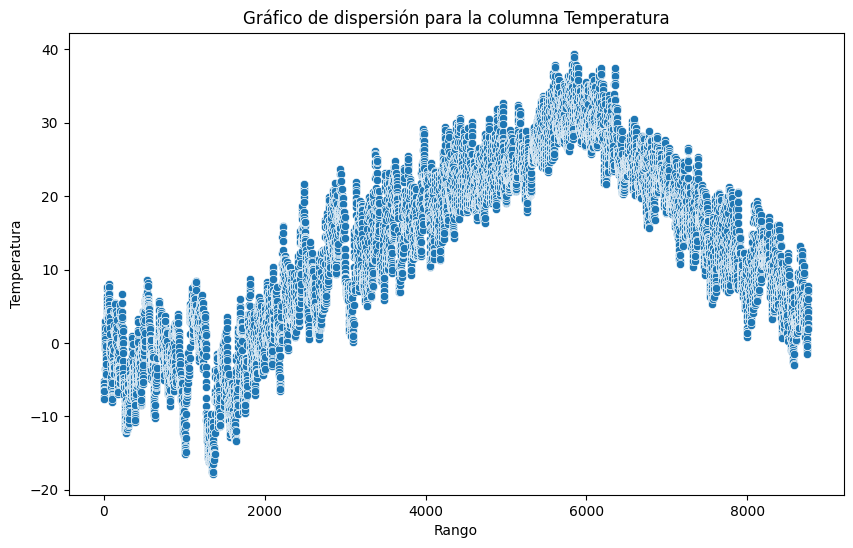

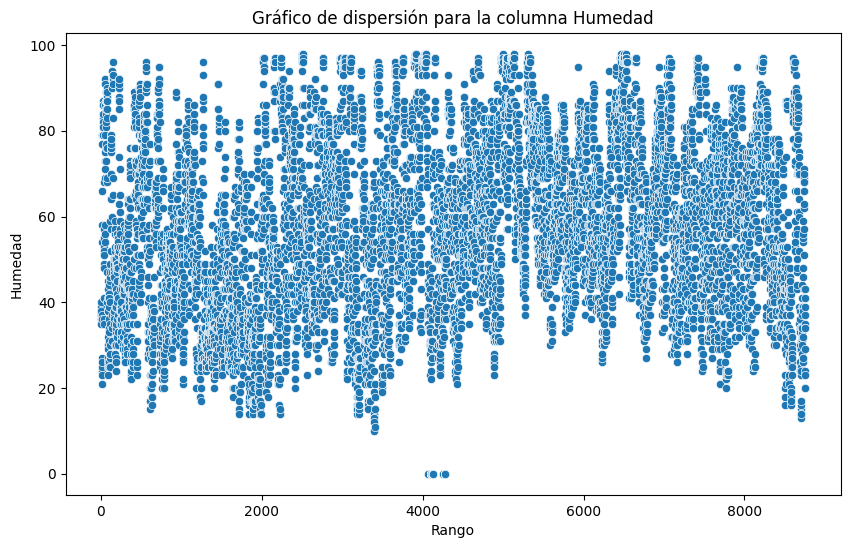

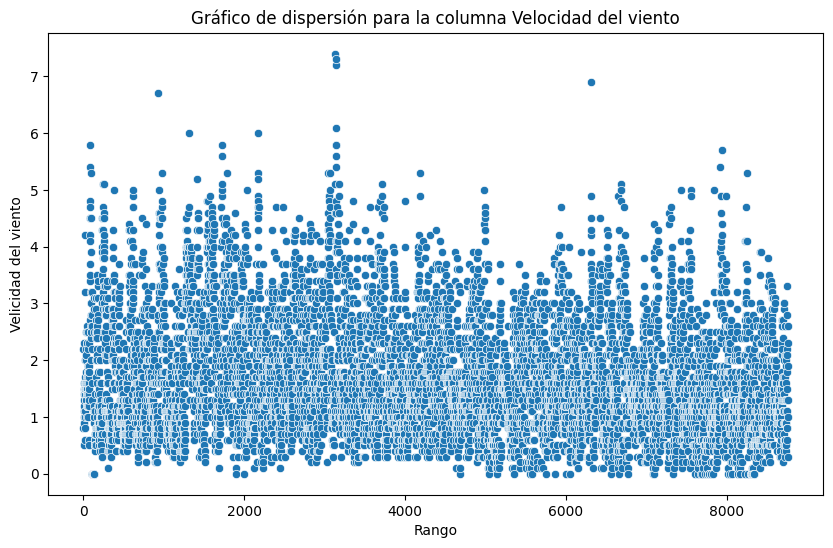

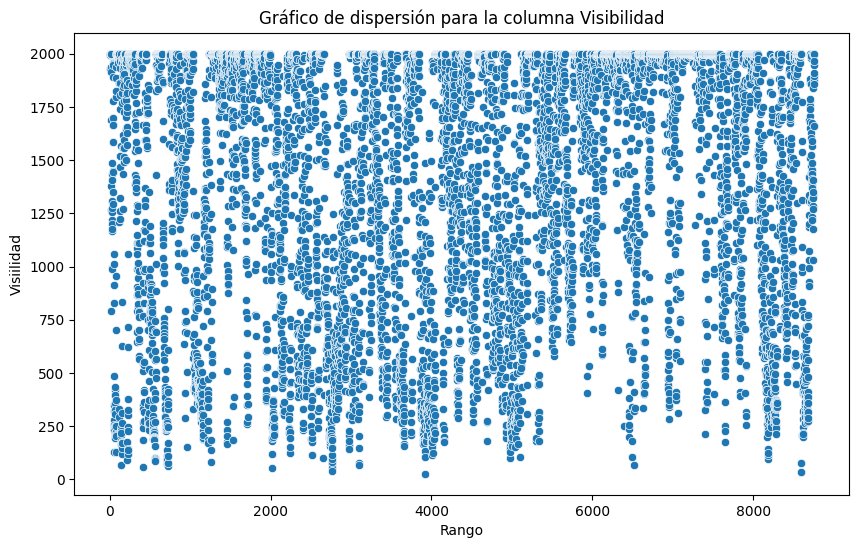

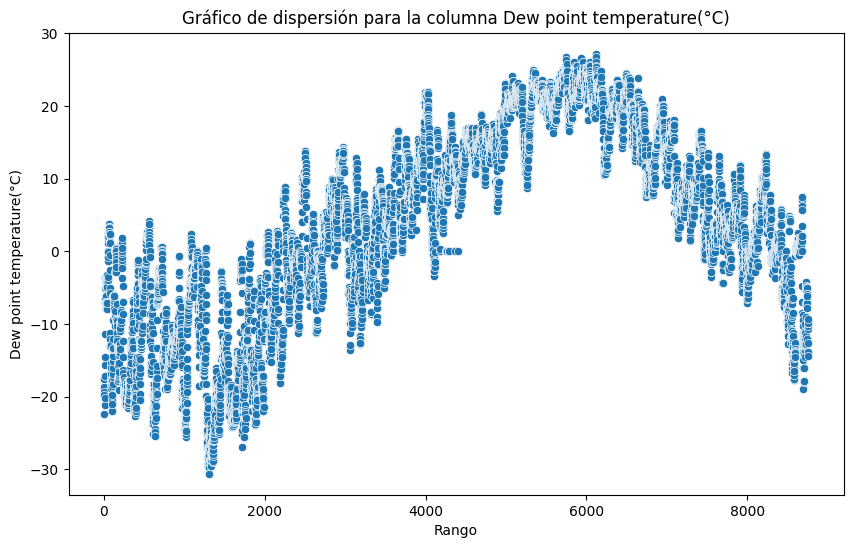

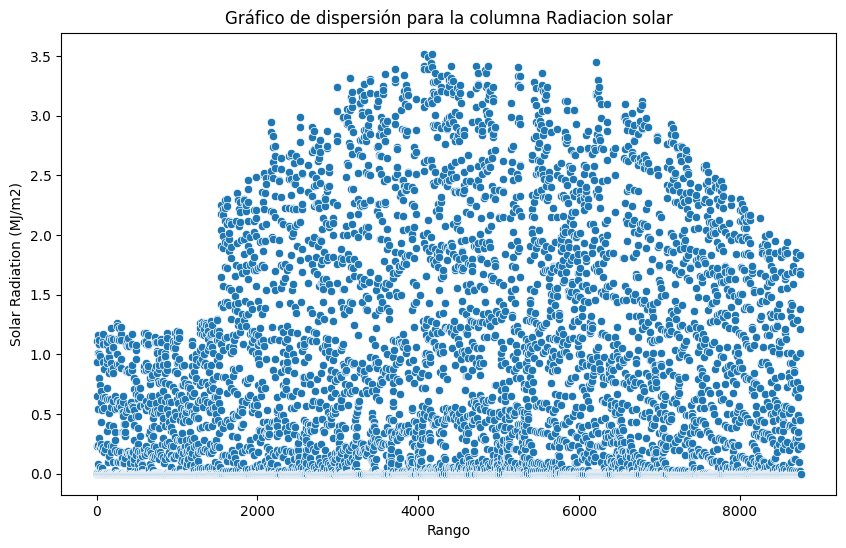

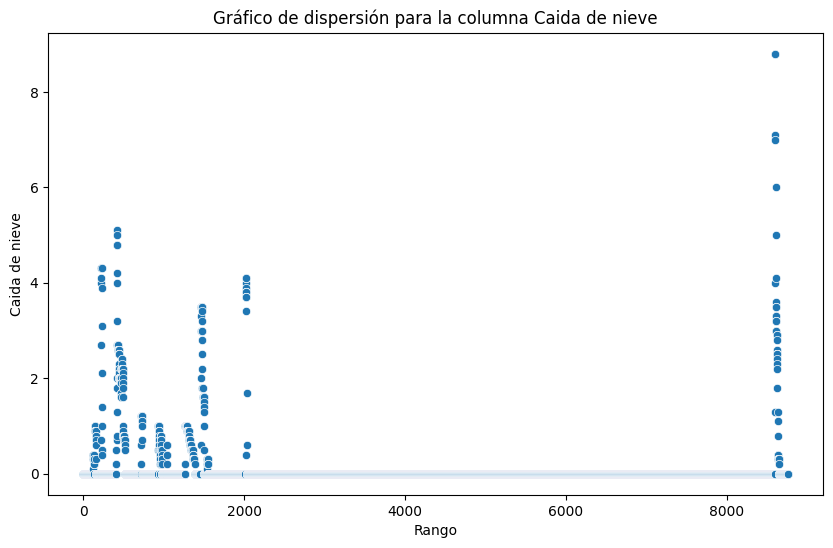

In [7]:
# 2.4 Detección y visualización de valores atípicos
!pip install seaborn
import seaborn as sns
df.head()
#Detección y visualización de valores atípicos para la columna 'Temperature'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Temperature(°C)'])
plt.title('Gráfico de dispersión para la columna Temperatura')
plt.xlabel('Rango')
plt.ylabel('Temperatura')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Humedad'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Humidity(%)'])
plt.title('Gráfico de dispersión para la columna Humedad')
plt.xlabel('Rango')
plt.ylabel('Humedad')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Velocidad del viento'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Wind speed (m/s)'])
plt.title('Gráfico de dispersión para la columna Velocidad del viento')
plt.xlabel('Rango')
plt.ylabel('Velicidad del viento')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Visibilidad'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Visibility (10m)'])
plt.title('Gráfico de dispersión para la columna Visibilidad')
plt.xlabel('Rango')
plt.ylabel('Visiilidad')
plt.show()

#Detección y visualización de valores atípicos para la columna 'Dew point temperature(°C)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Dew point temperature(°C)'])
plt.title('Gráfico de dispersión para la columna Dew point temperature(°C)')
plt.xlabel('Rango')
plt.ylabel('Dew point temperature(°C)')
plt.show()


#Detección y visualización de valores atípicos para la columna Radiacion solar
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Solar Radiation (MJ/m2)'])
plt.title('Gráfico de dispersión para la columna Radiacion solar')
plt.xlabel('Rango')
plt.ylabel('Solar Radiation (MJ/m2)')
plt.show()


#Detección y visualización de valores atípicos para la columna Caida de nieve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Snowfall (cm)'])
plt.title('Gráfico de dispersión para la columna Caida de nieve')
plt.xlabel('Rango')
plt.ylabel('Caida de nieve')
plt.show()


In [8]:
# Aplicación de técnicas EDA orientadas a determinar problemas de calidad en los datos

# Cambiar  a NaN todos los valores de la columna 'Humedad ' que sean cero
df['Humidity(%)'] = df['Humidity(%)'].replace(0, np.nan)
print(df.head())

# Cambiar  a NaN todos los valores de la columna 'Velocidad del viento mayor a 6  '
df.loc[df['Wind speed (m/s)'] > 6, 'Wind speed (m/s)'] = np.nan
print(df.head())

# Cambiar  a NaN todos los valores de la columna 'Velocidad del viento' mayor a 6
df.loc[df['Wind speed (m/s)'] > 6, 'Wind speed (m/s)'] = np.nan
print(df.head())

# Cambiar  a NaN todos los valores de la columna 'Caida de nieve'  mayor a 6
df.loc[df['Snowfall (cm)'] > 6, 'Snowfall (cm)'] = np.nan
print(df.head())

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2         37.0   
1 2017-12-01                204     1             -5.5         38.0   
2 2017-12-01                173     2             -6.0         39.0   
3 2017-12-01                107     3             -6.2         40.0   
4 2017-12-01                 78     4             -6.0         36.0   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1     

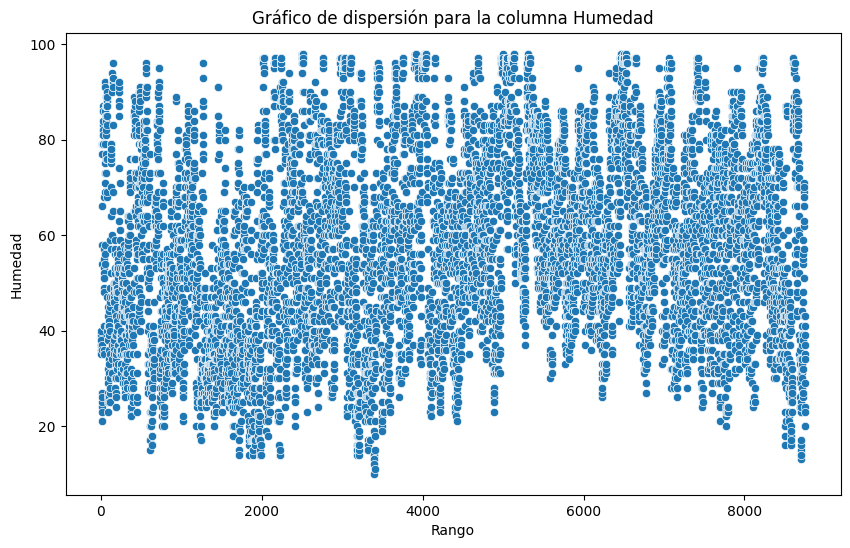

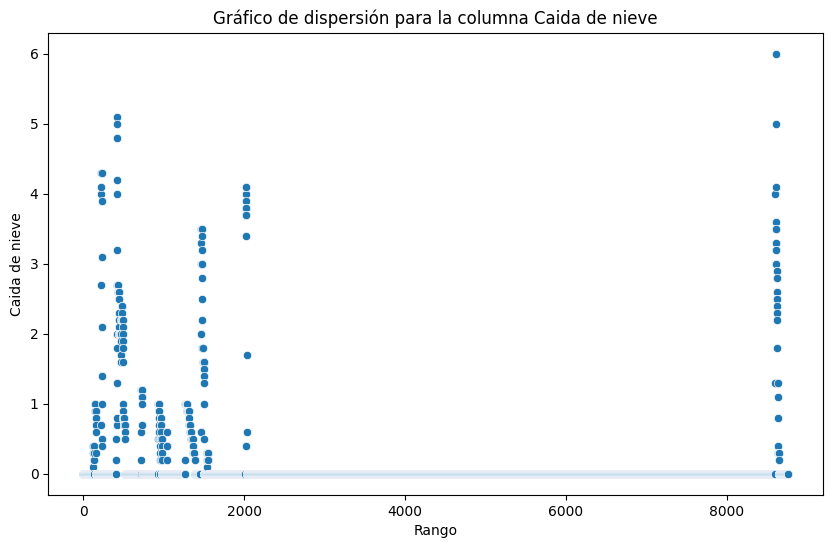

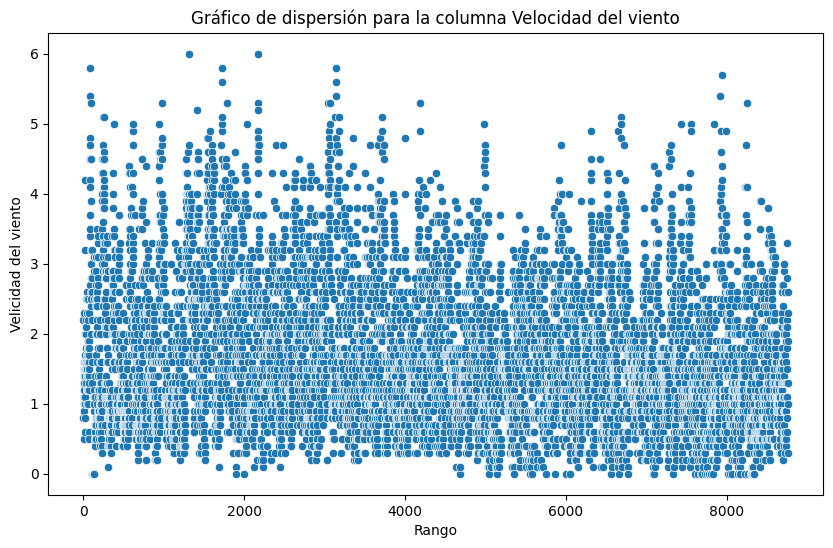

In [9]:
#Detección y visualización  de la columna 'Humedad' sin valores atípicos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Humidity(%)'])
plt.title('Gráfico de dispersión para la columna Humedad')
plt.xlabel('Rango')
plt.ylabel('Humedad')
plt.show()


#Detección y visualización de la columna Caida de nieve sin valores atípicos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Snowfall (cm)'])
plt.title('Gráfico de dispersión para la columna Caida de nieve')
plt.xlabel('Rango')
plt.ylabel('Caida de nieve')
plt.show()


#Detección y visualización de la columna 'Velocidad del viento' sin valores atípicos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Wind speed (m/s)'])
plt.title('Gráfico de dispersión para la columna Velocidad del viento')
plt.xlabel('Rango')
plt.ylabel('Velicidad del viento')
plt.show()

In [ ]:
# Se verifica que en las variables categóricas los datos estan correctos

In [10]:
# 2.3 Verificar valores faltantes y obtiene el total de registros y el porcentaje
def verificar_faltantes(df):
    total = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])

verificar_faltantes(df)

,Total,Porcentaje
Humidity(%),17,0.194064
Wind speed (m/s),6,0.068493
Snowfall (cm),4,0.045662
Date,0,0.000000
Rented Bike Count,0,0.000000
Hour,0,0.000000
Temperature(°C),0,0.000000
Visibility (10m),0,0.000000
Dew point temperature(°C),0,0.000000
Solar Radiation (MJ/m2),0,0.000000


In [16]:
# eliminar  registros con campos nulos de las columnas Humidity(%), Wind speed (m/s), Snowfall (cm) se eliminaron solo 4 registros
df_clean = df.dropna(subset=['Humidity(%)'])
df_clean = df.dropna(subset=['Wind speed (m/s)'])
df_clean = df.dropna(subset=['Snowfall (cm)'])

#imprimo numero de registros de df limpio
num_filas = len(df_clean)
print("Número de filas en el DataFrame:", num_filas)

Número de filas en el DataFrame: 8756
